# overview

In [22]:
# default package
import logging
import sys
import os 
import pathlib

In [1]:
# third party package
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pandas_profiling as pdp
import torch

In [24]:
# my package
sys.path.append(os.path.join(pathlib.Path().resolve(),"../"))

In [25]:
# reload settings
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
# logger
logger=logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

In [40]:
# graph settings
sns.set()
%matplotlib inline

In [28]:
def cd_project_root_()->None:
    current=pathlib.Path().cwd()
    if current.stem=="notebooks":
        os.chdir(current.parent)
    logger.info(f"current directory: {pathlib.Path().cwd()}")

cd_project_root_()

INFO:__main__:current directory: /workspaces/load_to_goal/Kaggle/kaggle-google-brain


## EDA

In [29]:
df_train=pd.read_csv("./data/raw/train.csv")
df_test=pd.read_csv("./data/raw/test.csv")
df_sample=pd.read_csv("./data/raw/sample_submission.csv")

In [12]:
df_train

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,3.869032
6035996,6035997,125749,50,10,2.537961,1.488497,1,3.869032
6035997,6035998,125749,50,10,2.571408,1.558978,1,3.798729
6035998,6035999,125749,50,10,2.604744,1.272663,1,4.079938


In [13]:
df_test

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0
...,...,...,...,...,...,...,...
4023995,4023996,125748,20,10,2.530117,4.971245,1
4023996,4023997,125748,20,10,2.563853,4.975709,1
4023997,4023998,125748,20,10,2.597475,4.979468,1
4023998,4023999,125748,20,10,2.631134,4.982648,1


In [16]:
df_sample

,id,pressure
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
4023995,4023996,0
4023996,4023997,0
4023997,4023998,0
4023998,4023999,0


### pandas profiling

In [20]:
profile = pdp.ProfileReport(df_train)
profile.to_file(output_file="data/eda/df_train.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/workspaces/load_to_goal/Kaggle/kaggle-google-brain/.venv/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
profile = pdp.ProfileReport(df_test)
profile.to_file(output_file="data/eda/df_test.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/workspaces/load_to_goal/Kaggle/kaggle-google-brain/.venv/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### breath_id=28 (https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/276599)

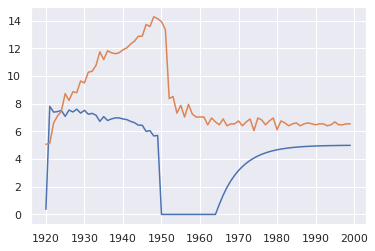

In [46]:
df_train[df_train["breath_id"]==28]["u_in"].plot();
df_train[df_train["breath_id"]==28]["pressure"].plot();

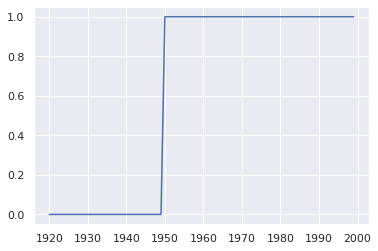

In [47]:
df_train[df_train["breath_id"]==28]["u_out"].plot();

In [45]:
df_train

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,3.869032
6035996,6035997,125749,50,10,2.537961,1.488497,1,3.869032
6035997,6035998,125749,50,10,2.571408,1.558978,1,3.798729
6035998,6035999,125749,50,10,2.604744,1.272663,1,4.079938


In [51]:
(df_train['u_in']).groupby(df_train['breath_id']).mean()

breath_id
1         10.146007
2          5.093747
3          5.457599
4          6.002238
5         12.159061
            ...    
125740     3.366334
125742     7.892086
125743     2.358771
125745     5.802509
125749     4.911402
Name: u_in, Length: 75450, dtype: float64

## check

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
device

device(type='cuda')

In [10]:
import os 
from dotenv import load_dotenv

In [18]:
load_dotenv("..env")

True

In [19]:
os.environ.get("WANDB_API")

'4001b45fc635c67577ee6295e18be4378a03b360'

In [17]:
!pwd

/workspaces/load_to_goal/Kaggle/kaggle-google-brain/notebooks
